In [1]:
import Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("StatsPlots")
using DataFrames, CSV

   Resolving package versions...
      Compat entries added for 
  No Changes to `~/Projekte/genier/Project.toml`
  No Changes to `~/Projekte/genier/Manifest.toml`
   Resolving package versions...
      Compat entries added for 
  No Changes to `~/Projekte/genier/Project.toml`
  No Changes to `~/Projekte/genier/Manifest.toml`
   Resolving package versions...
      Compat entries added for 
  No Changes to `~/Projekte/genier/Project.toml`
  No Changes to `~/Projekte/genier/Manifest.toml`


In [2]:
df = CSV.read("real_erz_22-24.csv", DataFrame, dateformat="d.m.y H:M", decimal=',', groupmark='.')
rename!(df, :"Datum von" => "start")
rename!(df, :"Datum bis" => "end")
rename!(df, :"Biomasse [MWh] Originalauflösungen" => :"biomasse")
rename!(df, :"Wasserkraft [MWh] Originalauflösungen" => "wasserkraft")
rename!(df, :"Wind Offshore [MWh] Originalauflösungen" => "wind_offshore")
rename!(df, :"Wind Onshore [MWh] Originalauflösungen" => "wind_onshore")
rename!(df, :"Photovoltaik [MWh] Originalauflösungen" => :"solar")
rename!(df, :"Sonstige Erneuerbare [MWh] Originalauflösungen" => "sonstige_erneuerbar")
rename!(df, :"Kernenergie [MWh] Originalauflösungen" => "kernenergie")
rename!(df, :"Braunkohle [MWh] Originalauflösungen" => "braunkohle")
rename!(df, :"Steinkohle [MWh] Originalauflösungen" => :"steinkohle")
rename!(df, :"Erdgas [MWh] Originalauflösungen" => "erdgas")
rename!(df, :"Pumpspeicher [MWh] Originalauflösungen" => "pumpspeicher")
rename!(df, :"Sonstige Konventionelle [MWh] Originalauflösungen" => "sonstige_konventionell")

70176×14 DataFrame
   Row │ start                end                  biomasse  wasserkraft  wind ⋯
       │ DateTime             DateTime             Float64   Float64      Floa ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 2022-12-01T00:00:00  2022-12-01T00:15:00   1088.25       368.0        ⋯
     2 │ 2022-12-01T00:15:00  2022-12-01T00:30:00   1086.25       347.0
     3 │ 2022-12-01T00:30:00  2022-12-01T00:45:00   1079.25       341.25
     4 │ 2022-12-01T00:45:00  2022-12-01T01:00:00   1079.0        338.25
     5 │ 2022-12-01T01:00:00  2022-12-01T01:15:00   1078.5        333.5        ⋯
     6 │ 2022-12-01T01:15:00  2022-12-01T01:30:00   1079.5        331.75
     7 │ 2022-12-01T01:30:00  2022-12-01T01:45:00   1078.25       347.0
     8 │ 2022-12-01T01:45:00  2022-12-01T02:00:00   1076.25       348.75
     9 │ 2022-12-01T02:00:00  2022-12-01T02:15:00   1074.25       355.0        ⋯
    10 │ 2022-12-01T02:15:00  2022-12-01T02:30:00   1072.5        354.75
    11 │ 2022-12-01T02:30:00  2022-12-01T02:45:00   1070.5        349.0
   ⋮   │          ⋮                    ⋮              ⋮           ⋮            ⋱
 70167 │ 2024-11-30T21:30:00  2024-11-30T21:45:00   1095.25       322.25
 70168 │ 2024-11-30T21:45:00  2024-11-30T22:00:00   1095.0        319.75       ⋯
 70169 │ 2024-11-30T22:00:00  2024-11-30T22:15:00   1093.5        329.75
 70170 │ 2024-11-30T22:15:00  2024-11-30T22:30:00   1092.75       320.25
 70171 │ 2024-11-30T22:30:00  2024-11-30T22:45:00   1091.5        319.75
 70172 │ 2024-11-30T22:45:00  2024-11-30T23:00:00   1090.75       316.25       ⋯
 70173 │ 2024-11-30T23:00:00  2024-11-30T23:15:00   1091.75       313.0
 70174 │ 2024-11-30T23:15:00  2024-11-30T23:30:00   1091.5        308.25
 70175 │ 2024-11-30T23:30:00  2024-11-30T23:45:00   1090.75       308.75
 70176 │ 2024-11-30T23:45:00  2024-12-01T00:00:00   1087.0        308.25       ⋯
                                               10 columns and 70155 rows omitted

In [3]:
CSV.write("real_erz_22-24_clean.csv", df)

"real_erz_22-24_clean.csv"

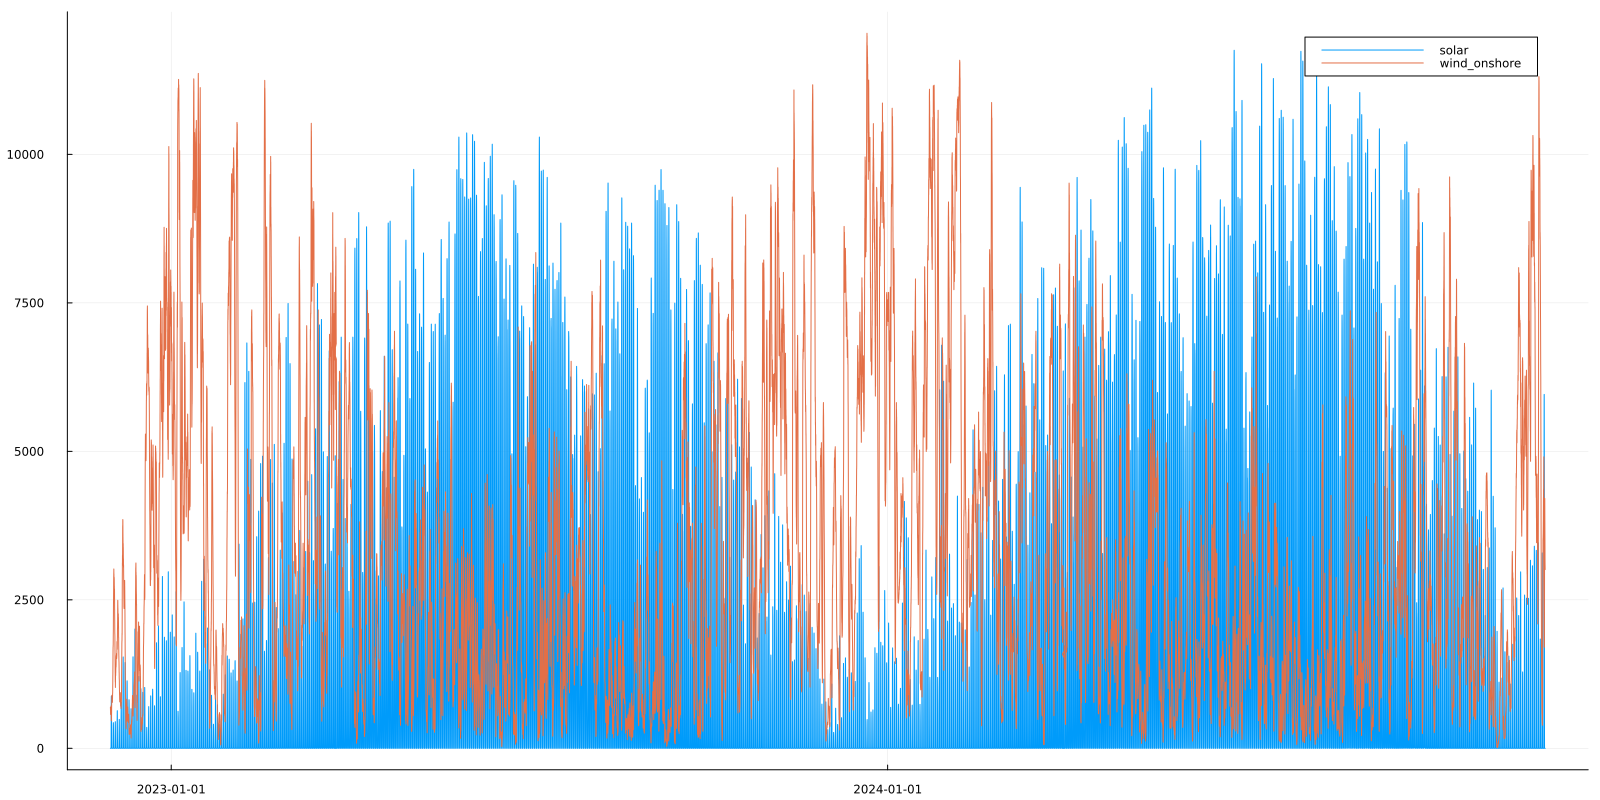

In [13]:
using StatsPlots
gr(size=(1600,800))
@df df plot(:end, [:solar :wind_onshore])